# Task: Exploring and Cleaning Historical Rainfall Data

## Objective:
The goal of this task is to guide you through data cleaning, visualization, and advanced operations using pandas, numpy, and matplotlib. You will work with a historical rainfall dataset to clean the data, create visualizations, and perform advanced operations such as grouping, aggregating, hierarchical indexing, and joining datasets.

---

## 1. Data Cleaning and Inspection:
- Load the dataset and examine its structure using `.info()` and `.describe()`. 
- Identify any columns with missing values and inspect their distribution.
- Check for duplicate entries and handle them appropriately (if any).
  
**Instructions**:
- Print the number of missing values in each column.
- Print the number of duplicate rows in the dataset.


In [3]:
# Load the dataset and check for missing values and duplicates
import pandas as pd

rainfall_data = pd.read_csv('Historical_Rainfall_20240201.csv')

# Print missing values count
missing_values = rainfall_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Print duplicate rows count
duplicates = rainfall_data.duplicated().sum()
print("\nDuplicates:", duplicates)

Missing Values:
 CHANNEL          0
NAME         28088
YEAR             0
TIMESTAMP        0
RAINFALL         0
ID               0
dtype: int64

Duplicates: 0


# 2. Handling Missing Values

## **Problem Statement**
The `"NAME"` column in the dataset has some missing values. Your tasks are:
1. Explore the rows with missing `"NAME"` values and decide on an appropriate strategy to fill them.
2. Fill the missing values in the `"NAME"` column using **forward fill** or another appropriate method.
3. Verify that there are no remaining missing values in the `"NAME"` column after filling.



## **Instructions**


- Identify rows where the `"NAME"` column has missing values.
- Analyze the context of these rows to decide on the best strategy for filling the missing values.


In [4]:
# Fill missing values in the "NAME" column using forward fill
rainfall_data['NAME'].fillna(method='ffill', inplace=True)

# Print missing values after filling
missing_values_after_fill = rainfall_data.isnull().sum()
print("\nMissing Values after Fill:\n", missing_values_after_fill)



Missing Values after Fill:
 CHANNEL      0
NAME         0
YEAR         0
TIMESTAMP    0
RAINFALL     0
ID           0
dtype: int64


/var/folders/xm/dtk1g2nx457gfkp94_xvn6bm0000gn/T/ipykernel_30990/2734479235.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rainfall_data['NAME'].fillna(method='ffill', inplace=True)


## 3. Data Visualization:

### Create a histogram of the "RAINFALL" column to visualize its distribution.
- Plot a histogram to understand how the rainfall data is distributed.
- Use matplotlib to create and display the histogram.

### Plot a time series line chart showing the average rainfall per year.
- Group the data by year and calculate the average rainfall.
- Plot a line chart to visualize the trends of average rainfall over time.
- Comment on any patterns or trends observed over the years.

### Create a box plot to visualize the distribution of rainfall by "CHANNEL".
- Use a box plot to compare the distribution of rainfall across different "CHANNEL" categories.
- This will help identify potential outliers and the spread of data within each category.

### Plot the average rainfall per year using a bar chart.
- Plot a bar chart to visualize the average rainfall per year.
- This will provide an alternative view of the data, compared to the time series line chart.

**Instructions:**
- Use matplotlib to create and display the plots mentioned above.
- Comment on the distribution patterns you observe in the histogram and the time series chart.


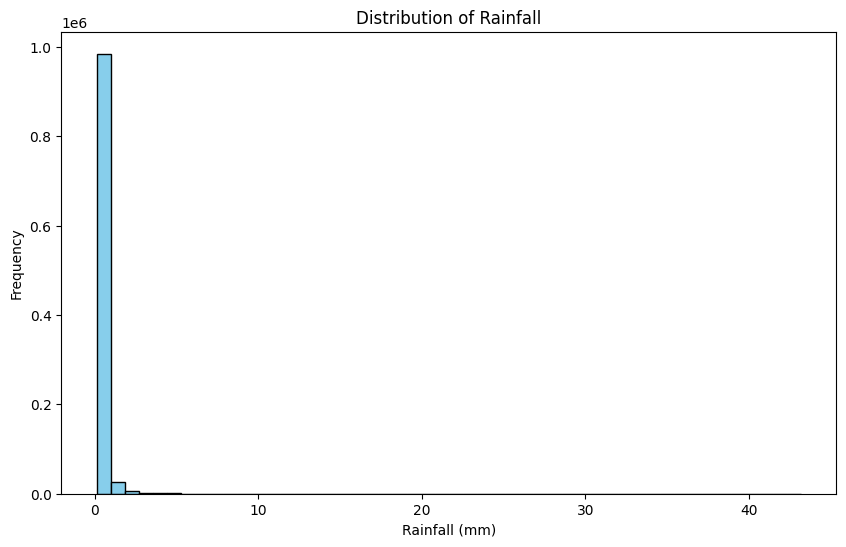

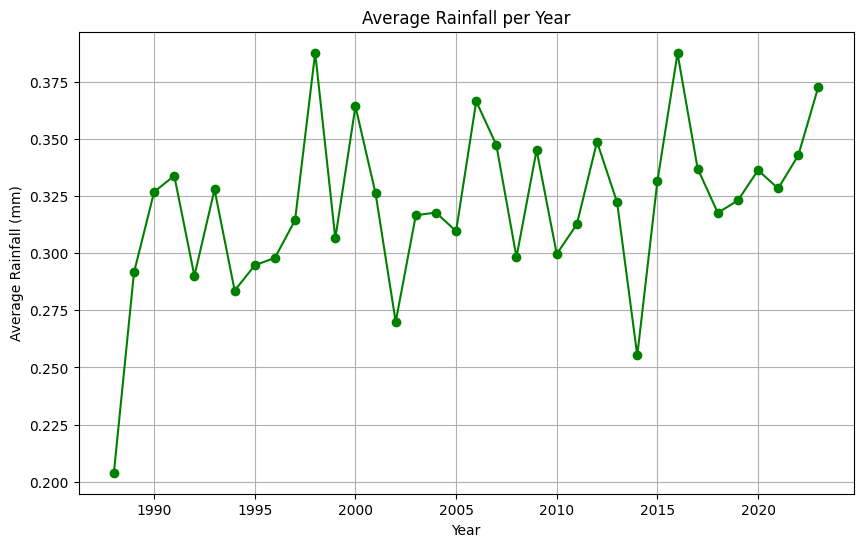

<Figure size 1000x600 with 0 Axes>

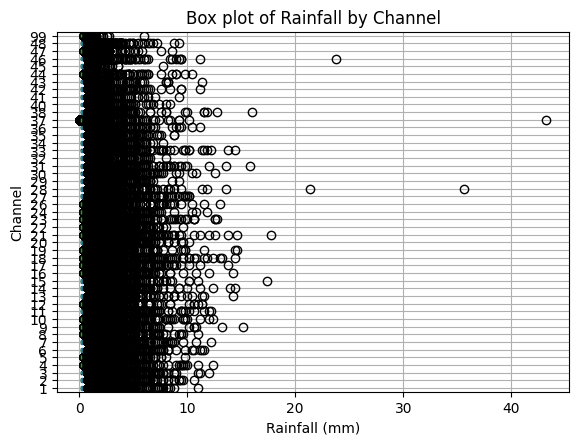

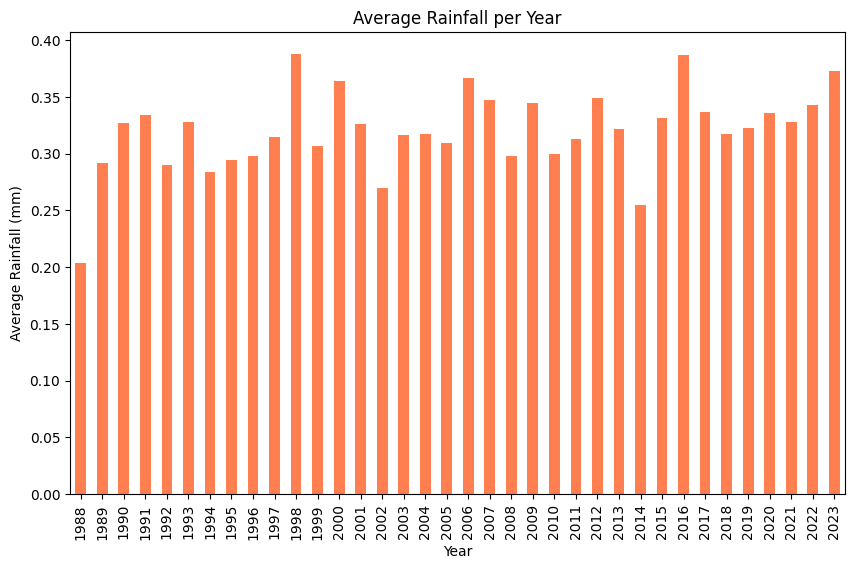

In [5]:
import matplotlib.pyplot as plt

# Histogram of rainfall
plt.figure(figsize=(10, 6))
plt.hist(rainfall_data['RAINFALL'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

# Time series plot of average rainfall per year
plt.figure(figsize=(10, 6))
rainfall_per_year = rainfall_data.groupby('YEAR')['RAINFALL'].mean()
rainfall_per_year.plot(kind='line', color='green', marker='o')
plt.title('Average Rainfall per Year')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm)')
plt.grid(True)
plt.show()

# Box plot of rainfall by channel
plt.figure(figsize=(10, 6))
rainfall_data.boxplot(column='RAINFALL', by='CHANNEL', vert=False, patch_artist=True)
plt.title('Box plot of Rainfall by Channel')
plt.suptitle('')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Channel')
plt.show()

# Bar chart of average rainfall per year
plt.figure(figsize=(10, 6))
rainfall_per_year.plot(kind='bar', color='coral')
plt.title('Average Rainfall per Year')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm)')
plt.show()


## 4. GroupBy and Aggregation:

- Group the data by the "CHANNEL" column and compute the mean, median, and total rainfall for each channel.

**Instructions:**
- Use `groupby()` to calculate and print the mean, median, and total rainfall per channel.


In [6]:
# Group the data by CHANNEL and calculate mean, median, and total rainfall
channel_stats = rainfall_data.groupby('CHANNEL')['RAINFALL'].agg(['mean', 'median', 'sum'])
print("\nChannel Statistics:\n", channel_stats)



Channel Statistics:
              mean  median      sum
CHANNEL                           
1        0.321669     0.2  10158.0
2        0.325558     0.2  10342.0
3        0.340070     0.2  11186.6
4        0.314644     0.2  10197.6
5        0.317397     0.2   9399.4
6        0.325845     0.2   9994.0
7        0.327173     0.2   9421.6
8        0.318291     0.2  10054.8
9        0.316855     0.2  10204.0
10       0.320155     0.2   9983.4
11       0.335344     0.2  10260.2
12       0.313300     0.2   9448.2
13       0.336167     0.2   9713.2
14       0.324722     0.2  10028.4
15       0.314383     0.2  10037.0
16       0.316198     0.2   9844.2
17       0.314993     0.2  10221.2
18       0.316515     0.2  10506.4
19       0.312940     0.2  10133.0
20       0.328200     0.2   9423.6
21       0.323648     0.2  10319.2
22       0.318423     0.2  10318.8
23       0.324288     0.2   8264.8
24       0.324143     0.2   8051.4
26       0.320191     0.2   7364.4
27       0.328447     0.2   8491.

## 5. Hierarchical Indexing:

- Set a multi-level index using "YEAR" and "CHANNEL".
- Perform a query to find the rainfall for a specific year and channel using `.loc[]`.
- Reset the index to return to a flat structure and demonstrate the difference between hierarchical and flat indexing.

**Instructions:**
- Set the multi-level index and use `.loc[]` to retrieve data for year 2021 and channel 44.
- Reset the index and show how the structure of the data changes.


In [7]:
# Set multi-level index using YEAR and CHANNEL
rainfall_data.set_index(['YEAR', 'CHANNEL'], inplace=True)

# Query rainfall data for a specific year and channel
rainfall_2021_channel_44 = rainfall_data.loc[(2021, 44), 'RAINFALL']
print(f"\nRainfall for Channel 44 in 2021: {rainfall_2021_channel_44}")

# Reset index to flat structure
rainfall_data_reset = rainfall_data.reset_index()



Rainfall for Channel 44 in 2021: YEAR  CHANNEL
2021  44         0.2
      44         0.2
      44         0.2
      44         0.2
      44         0.2
                ... 
      44         0.2
      44         0.2
      44         0.2
      44         0.2
      44         0.2
Name: RAINFALL, Length: 605, dtype: float64


/var/folders/xm/dtk1g2nx457gfkp94_xvn6bm0000gn/T/ipykernel_30990/3965874805.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  rainfall_2021_channel_44 = rainfall_data.loc[(2021, 44), 'RAINFALL']


## 6. Join Operations :

- Imagine you have a separate dataset with metadata about each channel, such as the region and description of the location.
- Perform a join operation to combine this metadata with the rainfall dataset based on the "CHANNEL" column.

**Instructions:**
- Create a small sample metadata dataframe with "CHANNEL", "Region", and "Description" columns.
- Merge the rainfall data with the metadata and display a sample of the merged dataset.


In [8]:
# Sample metadata dataframe for channels
channel_metadata = pd.DataFrame({
    'CHANNEL': [44, 48, 17, 18],
    'Region': ['East', 'South', 'North', 'West'],
    'Description': ['Forest Area', 'Urban', 'Residential', 'Suburban']
})

# Merge rainfall data with the metadata
rainfall_data_merged = pd.merge(rainfall_data_reset, channel_metadata, on='CHANNEL', how='left')
print("\nSample Merged Data:\n", rainfall_data_merged[['CHANNEL', 'NAME', 'RAINFALL', 'Region', 'Description']].head())



Sample Merged Data:
    CHANNEL               NAME  RAINFALL Region  Description
0       44  Forest Lawn Creek       0.2   East  Forest Area
1       48              Seton       0.2  South        Urban
2       17       Windsor Park       0.2  North  Residential
3       17       Windsor Park       0.2  North  Residential
4       18          Cedarbrae       0.2   West     Suburban
